In [5]:
import pickle
with open('random_point.pkl', 'rb') as f:
    randomPoints = pickle.load(f)

for point in randomPoints:
    print(point)

[(126.73377597334718, 33.5007104019223), (126.34907000880136, 33.3800196132525), (126.63625334117924, 33.464632663639435), (126.73935250653409, 33.42247923389137), (126.7781038455534, 33.426283030177544), (126.6219938938107, 33.27291411576873), (126.30500044411518, 33.39956231412672), (126.66564654130778, 33.37381026913591), (126.56205227741472, 33.260361000516845), (126.78836110607946, 33.344533117333725), (126.87608969946761, 33.404413613324316), (126.32398533121528, 33.326355382207645), (126.56028813873773, 33.26928007351293), (126.56712917964275, 33.392198373613624), (126.59213428054916, 33.28279588475575), (126.2461933972696, 33.29205245388578), (126.65239343787418, 33.403466840870564), (126.89373379172415, 33.444180073938824), (126.33866012369838, 33.26402413180963), (126.38481857567827, 33.2514673530489), (126.75357184277534, 33.49098310958973), (126.22750719391904, 33.3015980256012), (126.56441473856229, 33.27999971679555), (126.64731622400714, 33.30933949005081), (126.39573447

[4050115600, 4060006800, 4050057702, 4050011600, 4060007300, 4050165600, 4060015300, 4050087900, 4050109000, 4050096100, 4060081800, 4060170700, 4050123400, 4060027500, 4050059200, 4060135800, 4050196100, 4050089700, 4060129300, 4050204200, 4060032200, 4060101500, 4050152100, 4060119700, 4050025200, 4060039800, 4060060003, 4060076100, 4050083400, 4050131600, 4050134000, 4060076900]
{4050022400.0: 1.2660211834, 4050026500.0: 2.7218502633999995, 4050030600.0: 3.0659528017, 4050034700.0: 2.601419186, 4050038800.0: 2.09133668, 4050042900.0: 6.190371072, 4050047000.0: 1.187949985, 4050051100.0: 0.357274074, 4050157600.0: 3.6642622570999994, 4050055200.0: 5.2073791819999995, 4050059300.0: 1.7993608436, 4050059301.0: 2.1998374906, 4050161700.0: 6.049292598599999, 4050165800.0: 6.667941402, 4050063400.0: 5.404195373400001, 4050067500.0: 2.1460662615, 4050067501.0: 2.3192021095, 4050067502.0: 2.3600449155, 4050169900.0: 1.7675215843, 4050174000.0: 13.994294182999996, 4050075700.0: 1.30268542700

C:\Flutter\bin\ipykernel_9212\4135057840.py:33: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edge_color=edge_colors)


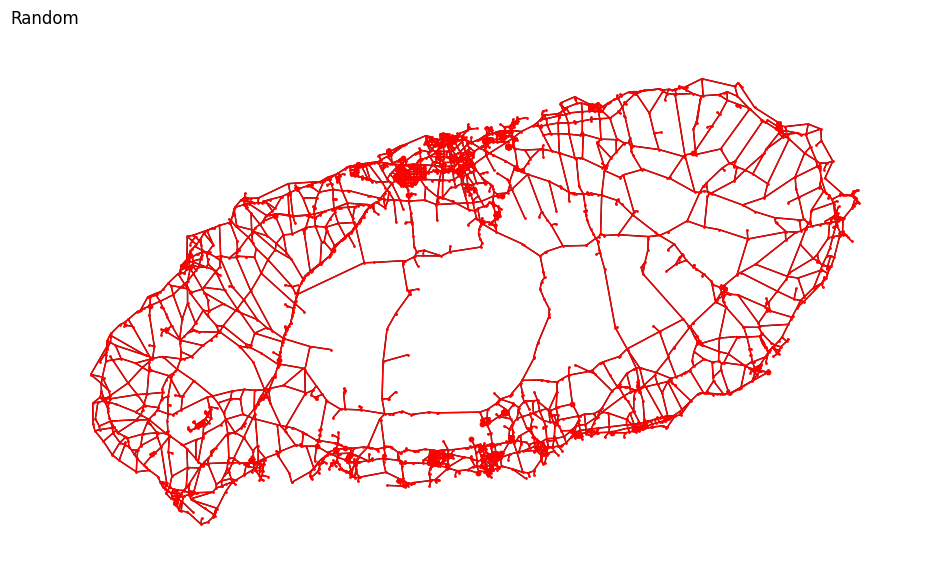

                ID   Distance  Adjusted_Distance
0     4.050022e+09   1.266021                  2
1     4.050026e+09   2.721850                  3
2     4.050031e+09   3.065953                  4
3     4.050035e+09   2.601419                  3
4     4.050039e+09   2.091337                  3
...            ...        ...                ...
4209  4.060087e+09  14.800707                 15
4210  4.050207e+09   8.457679                  9
4211  4.050208e+09   9.828707                 10
4212  4.060087e+09  13.517215                 14
4213  4.050208e+09  12.029236                 13

[4214 rows x 3 columns]


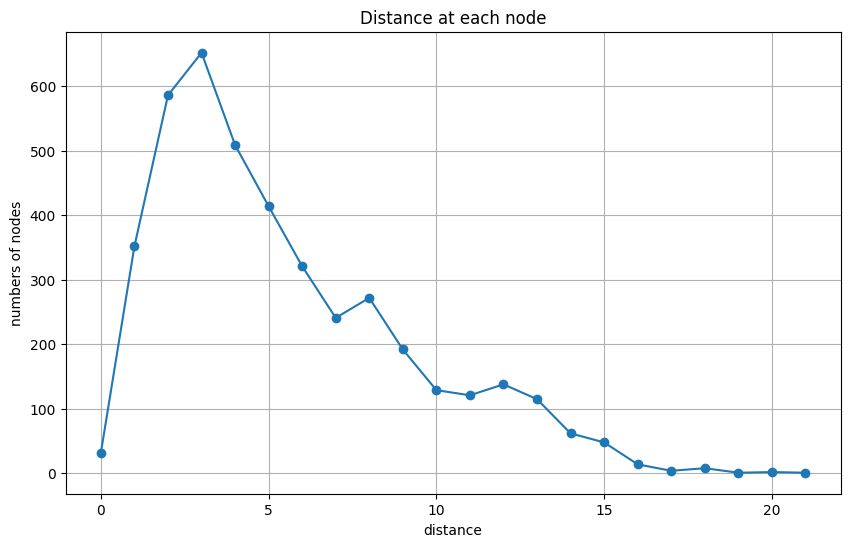

In [11]:
import pandas as pd
import numpy as np
import networkx as nx
from haversine import haversine
import random
import matplotlib.pyplot as plt
import math
%matplotlib inline

def serviceArea(graph, nodelist = [], w =5):
    ret = {}
    for node in nodelist:
        shortest_paths = nx.single_source_dijkstra_path_length(graph, node, cutoff=w, weight='weight')
        tmp=ret
        for key in set(shortest_paths.keys()).intersection(ret.keys()):
            tmp[key] = min(shortest_paths[key], ret[key])
        tmp.update({key: shortest_paths[key] for key in set(shortest_paths.keys()) - set(ret.keys())})
        tmp.update({key: ret[key] for key in set(ret.keys()) - set(shortest_paths.keys())})
        ret = tmp
    return ret

def draw(G, nodelist=None, select_color = 'red', title = ''):
    plt.figure(figsize= (12, 7))
    plt.cla()
    plt.axis('off')
    if title:
        plt.title(title, loc='left')
    nx.draw_networkx(G, pos=pos, node_size = 0, with_labels=False)
    if nodelist != None:
        nx.draw_networkx_nodes(G, pos, nodelist=random_nodes, node_color='red', node_size=10)
        nx.draw_networkx_nodes(G, pos, nodelist=nodelist, node_color=select_color, node_size=1)
        edge_colors = [select_color if (u in nodelist and v in nodelist) else 'black' for u, v in G.edges()]
        nx.draw_networkx_edges(G, pos, edge_color=edge_colors)
    plt.show()

nodes = pd.read_csv('data/Jeju_nodes.csv', encoding='utf-8')
links = pd.read_csv('data/Jeju_links.csv', encoding='cp949')
car = pd.read_csv('data/Jeju_car.csv', encoding='cp949')

nodes = nodes[['Id','NODE_NAME','latitude','longitude', 'average population']]
links = links[['Source','Target', '시간']]
source_in = links['Source'].apply(lambda x : x in list(nodes['Id'])) # check Sources are in jeju
target_in = links['Target'].apply(lambda x : x in list(nodes['Id'])) # check Targets are in jeju
# source_in and target_in are boolean type pandas.Series which contains True or False
jeju_links = links[source_in & target_in] # contain if both target and source are contained in jeju

G = nx.Graph()
for idx,row in nodes.iterrows():
    # add node to Graph G
    G.add_node(row['Id'],Label=row['NODE_NAME'],latitude=row['latitude'], longitude=row['longitude'])
for idx,row in jeju_links.iterrows():
    # Link attribute : 'Source', 'Target' and weight = '시간 between two nodes'
    G.add_edge(row['Source'],row['Target'],weight = row['시간'])    
# make a dictionary for node position

# Choose 32 nodes randomly from the existing nodes
random_nodes = random.sample(list(G.nodes), 32)
print(random_nodes)
# Create a subgraph with random nodes and their edges
area = serviceArea(G, random_nodes, 22)
print(area)
# Visualize the graph with different node colors
pos = {node: (G.nodes[node]['longitude'], G.nodes[node]['latitude']) for node in G.nodes()}
node_colors = ['red' if node in area else 'blue' for node in G.nodes()]
node_sizes = [10 if node in area else 3 for node in G.nodes()]
# nx.draw_networkx_nodes(G, pos, nodelist=random_nodes, node_color='red', node_size=10)

draw(G,area, select_color='red', title='Random')


# Convert the result dictionary to a DataFrame
result_df = pd.DataFrame(list(area.items()), columns=['ID', 'Distance'])

# Changing values in distance
def adjust_distance(distance):
    ret = math.ceil(distance)
    return ret
# generate new column
result_df['Adjusted_Distance'] = result_df['Distance'].apply(adjust_distance)
print(result_df)

node_counts = result_df.groupby('Adjusted_Distance').size()

# make graph
plt.figure(figsize=(10, 6))
plt.plot(node_counts.index, node_counts.values, marker='o')
plt.title('Distance at each node')
plt.xlabel('distance')
plt.ylabel('numbers of nodes')
plt.grid(True)
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22] 23
[26.0, 33.1, 95.5, 152.6, 230.8, 318.1, 351.2, 374.6, 378.4, 347.7, 345.7, 300.6, 279.1, 239.8, 210.7, 179.8, 126.6, 92.9, 61.8, 37.6, 28.9, 17.2, 6.9] 23


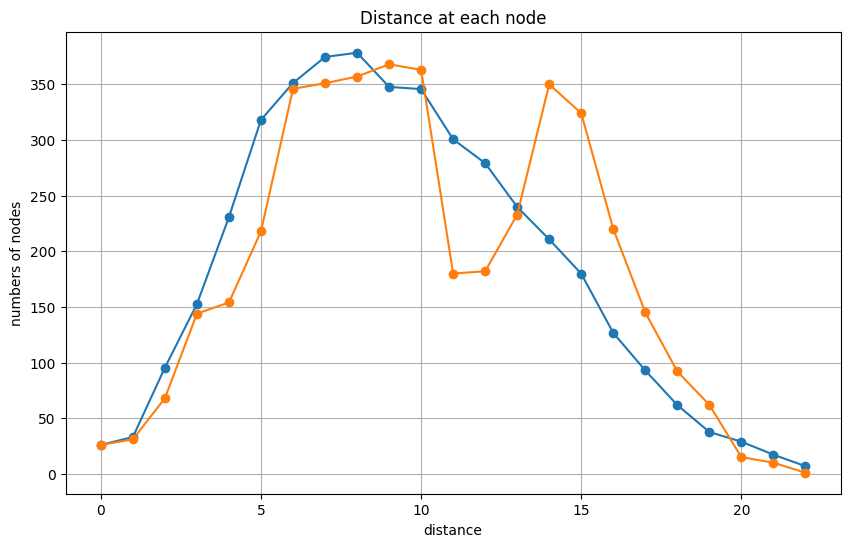

In [25]:
import pandas as pd
import numpy as np
import networkx as nx
from haversine import haversine
import random
import matplotlib.pyplot as plt
import math
%matplotlib inline

def serviceArea(graph, nodelist = [], w =5):
    ret = {}
    for node in nodelist:
        shortest_paths = nx.single_source_dijkstra_path_length(graph, node, cutoff=w, weight='weight')
        tmp=ret
        for key in set(shortest_paths.keys()).intersection(ret.keys()):
            tmp[key] = min(shortest_paths[key], ret[key])
        tmp.update({key: shortest_paths[key] for key in set(shortest_paths.keys()) - set(ret.keys())})
        tmp.update({key: ret[key] for key in set(ret.keys()) - set(shortest_paths.keys())})
        ret = tmp
    return ret

def draw(G, nodelist=None, select_color = 'red', title = ''):
    plt.figure(figsize= (12, 7))
    plt.cla()
    plt.axis('off')
    if title:
        plt.title(title, loc='left')
    nx.draw_networkx(G, pos=pos, node_size = 0, with_labels=False)
    if nodelist != None:
        nx.draw_networkx_nodes(G, pos, nodelist=random_nodes, node_color='red', node_size=10)
        nx.draw_networkx_nodes(G, pos, nodelist=nodelist, node_color=select_color, node_size=1)
        edge_colors = [select_color if (u in nodelist and v in nodelist) else 'black' for u, v in G.edges()]
        nx.draw_networkx_edges(G, pos, edge_color=edge_colors)
    plt.show()

def connectRes(graph, df): # df는 idx, latitude, longitude가 있어야함
    nodes_latitude = nx.get_node_attributes(graph, 'latitude')
    nodes_longitude = nx.get_node_attributes(graph, 'longitude')
    for idx, row in df.iterrows():
        distances ={}
        for keyLong, valLat in nodes_latitude.items():
            nodesPos = (valLat, nodes_longitude[keyLong])
            curPos = (row['latitude'], row['longitude'])
            distances[keyLong] = haversine(nodesPos, curPos, unit='km')
        nearest_node = min(distances, key=distances.get)
        graph.add_node(idx, Label=idx, latitude=row['latitude'], longitude=row['longitude']) ##노드이름은 4050000000이하로 설정
        w = distances[nearest_node]*1000/666 #단위 변환 km->m(*1000), 거리(m)->시간(분) (40km/h = 666m/s)
        graph.add_edge(nearest_node, idx, weight=w) 
    return graph

def adjust_distance(distance):
    ret = math.ceil(distance)
    return ret

nodes = pd.read_csv('data/Jeju_nodes.csv', encoding='utf-8')
links = pd.read_csv('data/Jeju_links.csv', encoding='cp949')
car = pd.read_csv('data/Jeju_car.csv', encoding='cp949')

nodes = nodes[['Id','NODE_NAME','latitude','longitude', 'average population']]
links = links[['Source','Target', '시간']]
source_in = links['Source'].apply(lambda x : x in list(nodes['Id'])) # check Sources are in jeju
target_in = links['Target'].apply(lambda x : x in list(nodes['Id'])) # check Targets are in jeju
# source_in and target_in are boolean type pandas.Series which contains True or False
jeju_links = links[source_in & target_in] # contain if both target and source are contained in jeju
# ----- 여기는 현실판
G = nx.Graph()
for idx,row in nodes.iterrows():
    # add node to Graph G
    G.add_node(row['Id'],Label=row['NODE_NAME'],latitude=row['latitude'], longitude=row['longitude'])
for idx,row in jeju_links.iterrows():
    # Link attribute : 'Source', 'Target' and weight = '시간 between two nodes'
    G.add_edge(row['Source'],row['Target'],weight = row['시간'])
G = connectRes(G, car)
realNodes = [i for i in range(26)]
area = serviceArea(G, realNodes, 22)
result_df = pd.DataFrame(list(area.items()), columns=['ID', 'Distance'])
result_df['Adjusted_Distance'] = result_df['Distance'].apply(adjust_distance)
node_counts = result_df.groupby('Adjusted_Distance').size()

# 여기는 랜덤판
result_x = []
result_y = []
for pointsList in randomPoints:
    G = nx.Graph()
    for idx,row in nodes.iterrows():
        # add node to Graph G
        G.add_node(row['Id'],Label=row['NODE_NAME'],latitude=row['latitude'], longitude=row['longitude'])
    for idx,row in jeju_links.iterrows():
        # Link attribute : 'Source', 'Target' and weight = '시간 between two nodes'
        G.add_edge(row['Source'],row['Target'],weight = row['시간'])    
    # make a dictionary for node position
    columns = ['longitude','latitude']
    df = pd.DataFrame(pointsList, columns=columns)
    G = connectRes(G, df)
    random_nodes = [i for i in range(26)]
    area = serviceArea(G, random_nodes, 22)
    result_df = pd.DataFrame(list(area.items()), columns=['ID', 'Distance'])
    result_df['Adjusted_Distance'] = result_df['Distance'].apply(adjust_distance)
    node_counts = result_df.groupby('Adjusted_Distance').size()
    x = list(node_counts.index)
    if len(x) > len(result_x):
        result_x = x
    y = list(node_counts.values)
    if result_y == []:
        result_y = y
    else:
        for i in range(len(y)):
            result_y[i] = result_y[i] + y[i]
result_y = [y/10 for y in result_y]
print(result_x, len(result_x))
print(result_y, len(result_y))
# make graph
plt.figure(figsize=(10, 6))
plt.plot(result_x, result_y, marker='o')
plt.plot(node_counts.index, node_counts.values, marker='o')
plt.title('Distance at each node')
plt.xlabel('distance')
plt.ylabel('numbers of nodes')
plt.grid(True)
plt.show()